In [3]:
from sklearn import datasets, svm, metrics
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [101]:
clf = svm.SVC()

In [35]:
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

In [36]:
x = x.reshape(70000, -1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, shuffle=False
)
#split data into test and train sets
#x = images, y = number values

In [65]:
# clf = pickle.load(open("svm.sav", 'rb'))

In [119]:
clf.fit(X_train, y_train) #training

SVC()

In [123]:
predicted = clf.predict(X_test) #using the model

In [126]:
X_test.shape

(28000, 784)

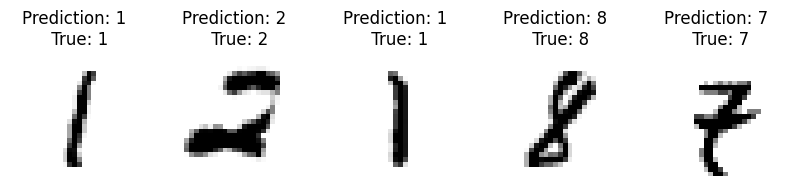

In [145]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction, label in zip(axes, X_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction} \n True: {label}")
#showing results

In [146]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2760
           1       0.98      0.99      0.99      3078
           2       0.97      0.98      0.97      2843
           3       0.97      0.97      0.97      2873
           4       0.97      0.98      0.98      2725
           5       0.98      0.97      0.97      2529
           6       0.98      0.99      0.99      2696
           7       0.98      0.97      0.97      2963
           8       0.97      0.97      0.97      2785
           9       0.97      0.96      0.96      2748

    accuracy                           0.98     28000
   macro avg       0.98      0.98      0.98     28000
weighted avg       0.98      0.98      0.98     28000




In [120]:
pickle.dump(clf, open("svm.sav", 'wb'))